In [101]:
import warnings
warnings.filterwarnings(action='ignore')

import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

# 1. 데이터 다운로드

# 2. Dataframe

In [102]:
data = pd.read_csv("C:/Users/진현킴/Desktop/diabetes.csv")

In [103]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [104]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# 3. EDA

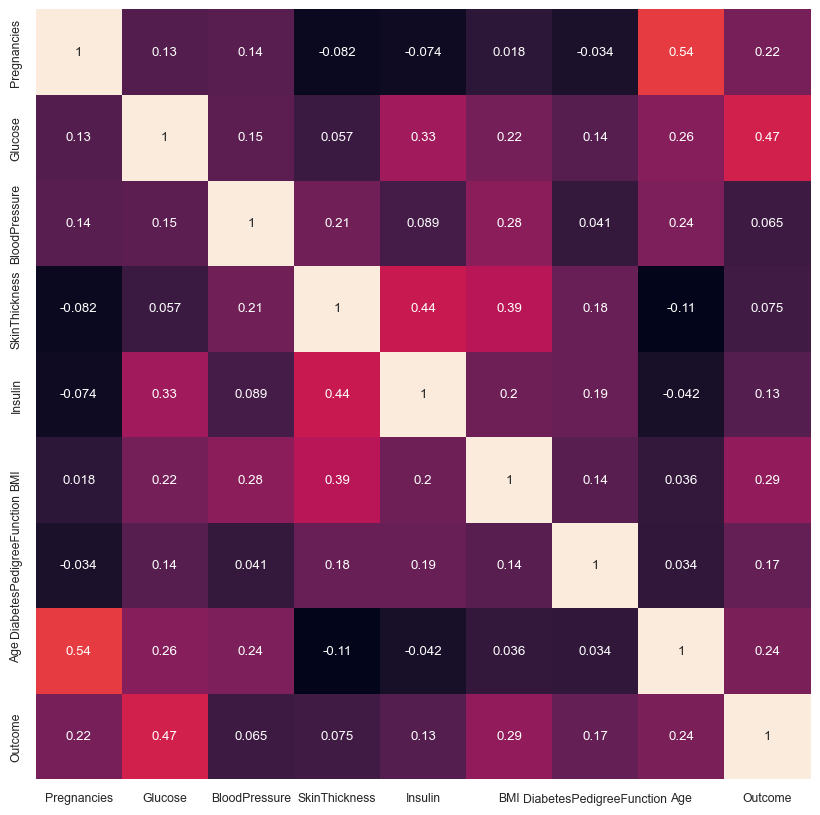

In [105]:
#상관 관계 행렬
df_corr=data.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [106]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 4. TEST/Train 분류

In [107]:
X = data.drop('Outcome',axis=1)
y = data['Outcome']

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

# DT, RF, LR, SVM 분류, confusion matrix

In [109]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print(accuracy_score(y_test, pred_svm))

0.7748917748917749


In [110]:
cm_svm = confusion_matrix(y_test, pred_svm)

print(cm_svm)

[[135   8]
 [ 44  44]]


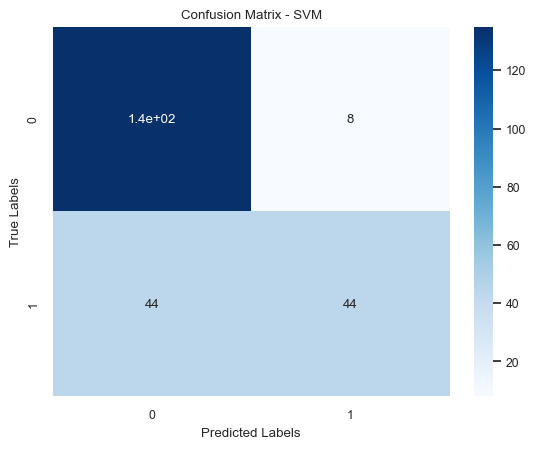

In [111]:
sns.heatmap(cm_svm, annot=True, cmap='Blues')
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [112]:
from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print (accuracy_score(y_test, pred_dt))

0.7186147186147186


In [113]:
## confusion metrix
cm_dt = confusion_matrix(y_test, pred_dt)

print(cm_dt)

[[110  33]
 [ 32  56]]


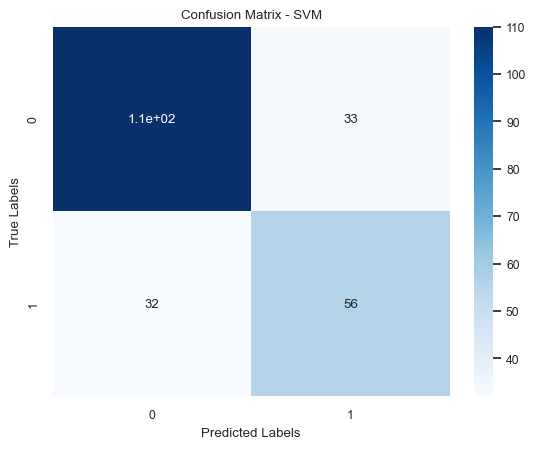

In [114]:
sns.heatmap(cm_dt, annot=True, cmap='Blues')
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [115]:

from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred_rf = rf_clf.predict(X_test)

print(accuracy_score(y_test,pred_rf))

0.7878787878787878


In [116]:
cm_rf = confusion_matrix(y_test, pred_rf)

print(cm_dt)

[[110  33]
 [ 32  56]]


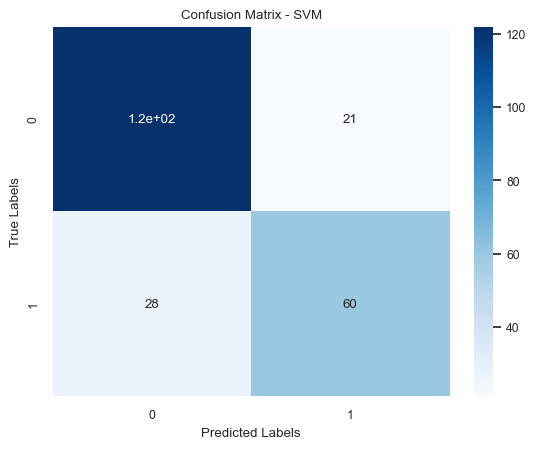

In [117]:
sns.heatmap(cm_rf, annot=True, cmap='Blues')
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [118]:
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print (accuracy_score(y_test, pred_lr))

0.7965367965367965


In [119]:
cm_lr = confusion_matrix(y_test, pred_lr)

print(cm_lr)

[[127  16]
 [ 31  57]]


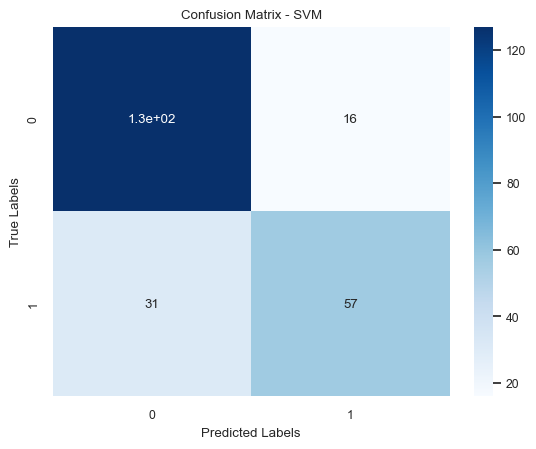

In [120]:
sns.heatmap(cm_lr, annot=True, cmap='Blues')
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# 6. outcome 제거

In [121]:
data1 = data.drop('Outcome',axis=1)

In [122]:
data1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


# BMI로부터 glucose 예측(DT, RF, LR, SVR)

In [123]:
X1 = data1['BMI'].values.reshape(-1,1)
y1 = data1['Glucose'].values.reshape(-1,1)

In [124]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.2, random_state = 10)

In [125]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

In [126]:
dt_1 =  DecisionTreeRegressor()
rt_1 = RandomForestRegressor()
ln_1 = LinearRegression()
sv_1 = SVR()

In [127]:
dt_1.fit(X1_train, y1_train)
pred_dt_1 = dt_1.predict(X1_test)
dt_mse = mean_squared_error(y1_test, pred_dt_1)
print(dt_1.score(X1_train, y1_train))

0.3799708877441812


In [128]:
mse1 = np.sqrt(mean_squared_error(pred_dt_1, y1_test))
print('평균제곱근오차', mse1)

평균제곱근오차 37.30324305197696


In [129]:
rt_1.fit(X1_train, y1_train)
pred_rt_1 = rt_1.predict(X1_test)
rt_mse = mean_squared_error(y1_test, pred_rt_1)
print(rt_1.score(X1_train, y1_train))

0.3579986772722854


In [130]:
mse2 = np.sqrt(mean_squared_error(pred_rt_1, y1_test))
print('평균제곱근오차', mse2)

평균제곱근오차 35.39156665278057


In [131]:
ln_1.fit(X1_train, y1_train)
pred_ln_1 = ln_1.predict(X1_test)
ln_mse = mean_squared_error(y1_test, pred_ln_1)
print(ln_1.score(X1_train, y1_train))

0.058276794363002704


In [132]:
mse3 = np.sqrt(mean_squared_error(pred_ln_1, y1_test))
print('평균제곱근오차', mse3)

평균제곱근오차 29.00770593855789


In [133]:
sv_1.fit(X1_train, y1_train)
pred_sv_1 = sv_1.predict(X1_test)
sv_1_mse = mean_squared_error(y1_test, pred_sv_1)
print(sv_1.score(X1_train, y1_train))

0.031290919150432694


In [134]:
mse4 = np.sqrt(mean_squared_error(pred_sv_1, y1_test))
print('평균제곱근오차', mse3)

평균제곱근오차 29.00770593855789
